In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True) 
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)

In [1]:
df=pd.read_csv("forex_dataframe_new.csv")
df.columns = df.columns.str.replace('.','_')


NameError: name 'pd' is not defined

In [8]:
df.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,M

In [9]:
df['target1'] = df['bid_close'].shift(-1)
df['target2'] = df['bid_close'].shift(-2)
df['target3'] = df['bid_close'].shift(-3)

In [10]:
df['PC_AUD_H4_target1'] = ((df['target1']-df['bid_close'])/df['bid_close'])*100
df['PC_AUD_H4_target2'] = ((df['target2']-df['bid_close'])/df['bid_close'])*100
df['PC_AUD_H4_target3'] = ((df['target3']-df['bid_close'])/df['bid_close'])*100

In [11]:
#df['trend_ema']=ta.trend.ema_indicator(df['bid_close'], n=12, fillna=True)
#df['trend_adx']=ta.trend.adx(df['bid_high'], df['bid_low'], df['bid_close'], n=14, fillna=True)

In [12]:
df_final = df

In [6]:
df_final=df.drop(columns=['PC2_AUD_H4', 'PC7_AUD_H4',
       'PC14_AUD_H4', 'PC20_AUD_H4', 'PC50_AUD_H4', 'STDEV_AUD_H4_1p',
       'STDEV_AUD_H4_2p', 'STDEV_AUD_H4_4p', 'STDEV_AUD_H4_7p',
       'STDEV_AUD_H4_10p', 'STDEV_AUD_H4_14p', 'STDEV_AUD_H4_20p',
       'CS_AUD_CAD_H4_7', 'correl_AUD_CAD_7p', 'CS_AUD_CAD_H4_10',
       'correl_AUD_CAD_10p', 'CS_AUD_CAD_H4_20', 'correl_AUD_CAD_20p',
       'CS_AUD_CHF_H4_7', 'correl_AUD_CHF_7p', 'CS_AUD_CHF_H4_10',
       'correl_AUD_CHF_10p', 'CS_AUD_CHF_H4_20', 'correl_AUD_CHF_20p',
       'CS_AUD_GBP_H4_7', 'correl_AUD_GBP_7p', 'CS_AUD_GBP_H4_10',
       'correl_AUD_GBP_10p', 'CS_AUD_GBP_H4_20', 'correl_AUD_GBP_20p',
       'CS_AUD_JPY_H4_7', 'correl_AUD_JPY_7p', 'CS_AUD_JPY_H4_10',
       'correl_AUD_JPY_10p', 'CS_AUD_JPY_H4_20', 'correl_AUD_JPY_20p',
       'CS_EUR_AUD_H4_7', 'correl_EUR_AUD_7p', 'CS_EUR_AUD_H4_10',
       'correl_EUR_AUD_10p', 'CS_EUR_AUD_H4_20', 'correl_EUR_AUD_20p'],axis=1)

In [7]:
#df_final1=df_final.set_index('time_local')

In [13]:
#df_final=df.copy()
df_final=df_final.dropna(how='all')

In [9]:
df_final=df_final.drop(['VOL_BOLLINGER_L_BANDS_AUD1','VOL_BOLLINGER_BANDS_AUD1'],axis=1)

In [14]:
df_final.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,M

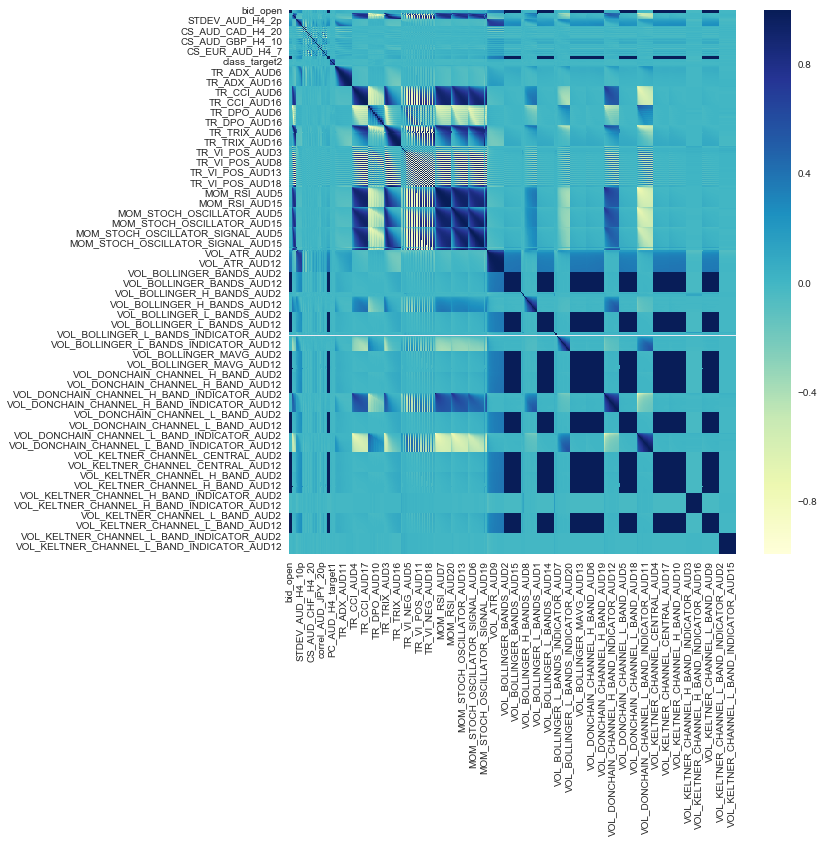

In [15]:
import seaborn as sns
#plt.figure(figsize=(10,10))
#sns.heatmap(df_final.corr(),center=0,annot=True)

corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_final[top_corr_features].corr(),cmap="YlGnBu")

In [28]:
df_final= pd.DataFrame(df_final)

In [29]:
df_final.shape

(15269, 542)

In [84]:
#df_final2=df_final.dropna(axis=0)
df_final2=df_final

In [85]:
df_final2.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,M

In [48]:
macro_economic_data=pd.read_excel(r"2007 to Jan 2019 Macro Economic Data.xlsx")

In [49]:
macro_economic_data_AUD=macro_economic_data[(macro_economic_data['Currency']=='AUD') ]

In [50]:
from datetime import datetime, timedelta

In [51]:
macro_economic_data_AUD['DateTime (GMT)']=macro_economic_data_AUD['DateTime (GMT)']+timedelta(hours=4)

In [52]:
macro_economic_data_AUD['Date']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).date

In [53]:
macro_economic_data_AUD.head()

,DateTime (GMT),Currency,Name,Country,Volatility,Actual,Previous,Consensus,Date
2,2007-01-22 05:30:00,AUD,Producer Price Index (QoQ),Australia,0,0.24,NaN,0.5,2007-01-22
3,2007-02-08 04:30:00,AUD,Unemployment Rate s.a.,Australia,1,4.50,NaN,4.6,2007-02-08
4,2007-02-08 04:30:00,AUD,Employment Change s.a.,Australia,0,-4.00,NaN,3.0,2007-02-08
65,2007-02-21 04:30:00,AUD,Wage Price Index (QoQ),Australia,1,1.10,NaN,1.0,2007-02-21
66,2007-02-21 04:30:00,AUD,Wage Price Index (YoY),Australia,1,4.00,NaN,3.9,2007-02-21


In [54]:
macro_economic_data_AUD['PC_macro_economic_ind'] = ( macro_economic_data_AUD['Actual'] - macro_economic_data_AUD['Previous'] ) / macro_economic_data_AUD['Previous'] 

In [55]:
macro_economic_data_AUD['PC_macro_economic_ind'].fillna(0,inplace=True)

In [56]:
macro_economic_data_AUD_summary=macro_economic_data_AUD.groupby(['Date'])['Volatility', 'PC_macro_economic_ind' ].mean().reset_index()

In [57]:
macro_economic_data_AUD_summary.head()

,Date,Volatility,PC_macro_economic_ind
0,2007-01-22,0.0,0.0
1,2007-02-08,0.5,0.0
2,2007-02-21,1.0,0.0
3,2007-03-15,1.0,-6.8
4,2007-04-03,1.0,0.0


In [73]:
macro_economic_data_AUD_summary.rename(index=str, inplace=True, columns={"Volatility": "Volatility_AUD", "PC_macro_economic_ind": "PC_macro_economic_ind_AUD"})

In [60]:
macro_economic_data_USD=macro_economic_data[(macro_economic_data['Currency']=='USD') ]

In [61]:
from datetime import datetime, timedelta

In [62]:
macro_economic_data_USD['DateTime (GMT)']=macro_economic_data_USD['DateTime (GMT)']+timedelta(hours=4)

In [63]:
macro_economic_data_USD['Date']=pd.DatetimeIndex(macro_economic_data_USD['DateTime (GMT)']).date

In [64]:
macro_economic_data_USD.head()

,DateTime (GMT),Currency,Name,Country,Volatility,Actual,Previous,Consensus,Date
22,2007-02-13 17:30:00,USD,Trade Balance,United States,2,-61.45,NaN,-59.5,2007-02-13
30,2007-02-14 17:30:00,USD,Retail Sales ex Autos (MoM),United States,0,0.20,NaN,0.3,2007-02-14
31,2007-02-14 17:30:00,USD,Retail Sales (MoM),United States,3,0.50,NaN,0.3,2007-02-14
32,2007-02-14 19:00:00,USD,Business Inventories,United States,1,0.00,NaN,0.3,2007-02-14
38,2007-02-15 17:30:00,USD,Import Price Index (YoY),United States,2,1.00,NaN,0.0,2007-02-15


In [65]:
macro_economic_data_USD['PC_macro_economic_ind'] = ( macro_economic_data_USD['Actual'] - macro_economic_data_USD['Previous'] ) / macro_economic_data_USD['Previous'] 

In [66]:
macro_economic_data_USD['PC_macro_economic_ind'].fillna(0,inplace=True)

In [67]:
macro_economic_data_USD_summary=macro_economic_data_USD.groupby(['Date'])['Volatility', 'PC_macro_economic_ind' ].mean().reset_index()

In [72]:
macro_economic_data_USD_summary.head()

,Date,Volatility_USD,PC_macro_economic_ind_USD
0,2007-02-13,2.000000,0.0
1,2007-02-14,1.333333,0.0
2,2007-02-15,2.000000,0.0
3,2007-02-16,2.000000,0.0
4,2007-02-21,1.600000,0.0


In [71]:
macro_economic_data_USD_summary.rename(index=str, inplace=True, columns={"Volatility": "Volatility_USD", "PC_macro_economic_ind": "PC_macro_economic_ind_USD"})

In [ ]:
import calendar

In [86]:
df_final2['date_local']=pd.DatetimeIndex(df_final2['time_local']).date
df_final2['time_local']=pd.to_datetime(df_final2['time_local'])
df_final2['time_local']=df_final2['time_local'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [87]:
df_final_3=pd.merge(df_final2,macro_economic_data_AUD_summary,how='left',right_on='Date',left_on='date_local')

In [88]:
df_final_3=pd.merge(df_final_3,macro_economic_data_USD_summary,how='left',right_on='Date',left_on='date_local')

In [90]:
df_final_3['year']=pd.DatetimeIndex(df_final_3['time_local']).year
df_final_3['month']=pd.DatetimeIndex(df_final_3['time_local']).month
df_final_3['day']=pd.DatetimeIndex(df_final_3['time_local']).day
df_final_3['hour']=pd.DatetimeIndex(df_final_3['time_local']).hour
df_final_3['dayofweek']=pd.DatetimeIndex(df_final_3['time_local']).dayofweek

In [91]:
df_final_3.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,M

In [102]:
X= df_final_3[df_final_3['year'] < 2018]
s=X[['year','month', 'dayofweek']]
for each in s:
    dummies = pd.get_dummies(s[each], prefix=each, drop_first=False)
    X=X.drop([each],axis=1)
    X = pd.concat([X, dummies], axis=1)

In [104]:
X.shape
#X.head()

(13554, 578)

In [105]:
X=X.drop(['time_local','start_time_local','end_time_local','class_target1','class_target2','class_target3', 'target2', 'target3','PC_AUD_H4_target2','PC_AUD_H4_target1','PC_AUD_H4_target3','Date_x', 'Date_y', 'date_local'],axis=1)

#'class_target1'

In [35]:
#X.isnull().sum()

In [107]:
X.fillna(0,inplace=True)

In [108]:
obj=X.loc[:, X.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
X[obj.columns]=obj
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [109]:
#X.to_csv("preciting_target_1.csv",index=False)

In [110]:
#y=np.exp(X['target1'])
X['target1']=X['target1']*10000
y=X['target1']
X=X.drop(['target1'],axis=1)

In [112]:
X.head()


,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_A

In [113]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.seed=0

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8551, 563) (8551,)
(3666, 563) (3666,)


In [43]:
'''from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)'''

'from sklearn.model_selection import GridSearchCV\nalphas = np.array([1,0.1,0.01,0.001,0.0001,0])\n# create and fit a ridge regression model, testing each alpha\nmodel = Lasso()\ngrid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))\ngrid.fit(X_train,y_train)'

In [44]:
#grid.best_params_

In [116]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [117]:
ridge_train_score = clf.score(X_train,y_train)

In [118]:
ridge_train_score

0.999553572320239

In [119]:

r2_score(y_test,y_pred)

0.9995074119622468

In [416]:
ridge_coef = clf.coef_

array([7674.70946102, 1189.88993025,  542.61846793,    0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
        417.17632442,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

In [51]:
#!pip install yellowbrick

In [427]:

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()


ModuleNotFoundError: No module named 'yellowbrick'

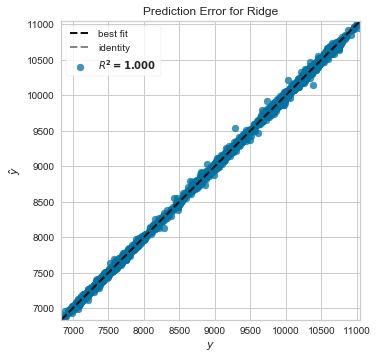

In [53]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Ridge()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

In [125]:
y_test1=pd.DataFrame(y_test)
y_pred1=pd.DataFrame(y_pred)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']

In [126]:
y_pred1.index=y_test1.index

In [128]:
df_plot=pd.concat([X_test,y_test1,y_pred1],axis=1)

In [129]:
df_plot.head()

,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_A

In [130]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [131]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

18.168038855216775

In [132]:
rmse_val = rmse(y_test, y_pred)
print("rms error is: " + str(rmse_val))

rms error is: 26.626602676629993


In [133]:
df_plot['diff']=abs(df_plot['y_test']-df_plot['y_pred'])
df_plot['diff_bid_close']=abs(df_plot['y_test']-df_plot['bid_close']*10000)
sorted_df=df_plot.sort_values(by='diff',ascending=False)

In [137]:
sorted_df.head(10)

,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_A

In [146]:
len(sorted_df[(sorted_df['diff_bid_close']>100) & (sorted_df['diff'] >100)]) 

25

In [147]:
len(sorted_df[(sorted_df['diff_bid_close']>100) & (sorted_df['diff'] <100)]) 

1

In [448]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] >50)]) 

25

In [449]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <19)]) 

1

In [148]:
len(sorted_df[(sorted_df['diff_bid_close']<19) & (sorted_df['diff'] >100)]) 

0

In [150]:
len(sorted_df[(sorted_df['diff_bid_close']<19) & (sorted_df['diff'] <100)]) 


2462

In [219]:
###### Co-relation to reduce feature set.

In [258]:
li=sorted_df[sorted_df.columns[1:]].corr()['y_test'][:-1].to_frame().reset_index()
li.dropna(axis=0,inplace=True)

In [238]:
sorted_Df2=li.sort_values(by='y_test',ascending=False)


In [517]:
cols_new=li.loc[(li['y_test'] >= 0.3) | (li['y_test'] <= -0.3)]['index'].tolist()

In [518]:
cols_new.remove('y_test')
cols_new.remove('y_pred')

In [519]:
cols_new

['bid_high',
 'bid_low',
 'bid_close',
 'CS_AUD_JPY_H4_7',
 'correl_EUR_AUD_7p',
 'VOL_ATR_AUD12',
 'VOL_ATR_AUD13',
 'VOL_ATR_AUD14',
 'VOL_ATR_AUD15',
 'VOL_ATR_AUD16',
 'VOL_ATR_AUD17',
 'VOL_ATR_AUD18',
 'VOL_ATR_AUD19',
 'VOL_ATR_AUD20',
 'VOL_BOLLINGER_BANDS_AUD2',
 'VOL_BOLLINGER_BANDS_AUD3',
 'VOL_BOLLINGER_BANDS_AUD4',
 'VOL_BOLLINGER_BANDS_AUD5',
 'VOL_BOLLINGER_BANDS_AUD6',
 'VOL_BOLLINGER_BANDS_AUD7',
 'VOL_BOLLINGER_BANDS_AUD8',
 'VOL_BOLLINGER_BANDS_AUD9',
 'VOL_BOLLINGER_BANDS_AUD10',
 'VOL_BOLLINGER_BANDS_AUD11',
 'VOL_BOLLINGER_BANDS_AUD12',
 'VOL_BOLLINGER_BANDS_AUD13',
 'VOL_BOLLINGER_BANDS_AUD14',
 'VOL_BOLLINGER_BANDS_AUD15',
 'VOL_BOLLINGER_BANDS_AUD16',
 'VOL_BOLLINGER_BANDS_AUD17',
 'VOL_BOLLINGER_BANDS_AUD18',
 'VOL_BOLLINGER_BANDS_AUD19',
 'VOL_BOLLINGER_BANDS_AUD20',
 'VOL_BOLLINGER_L_BANDS_AUD2',
 'VOL_BOLLINGER_L_BANDS_AUD3',
 'VOL_BOLLINGER_L_BANDS_AUD4',
 'VOL_BOLLINGER_L_BANDS_AUD5',
 'VOL_BOLLINGER_L_BANDS_AUD6',
 'VOL_BOLLINGER_L_BANDS_AUD7',
 'VOL_BOL

In [524]:
cols_new.remove('diff')

ValueError: list.remove(x): x not in list

In [525]:
new_try_df=X[cols_new]
new_try_df.head()

,bid_high,bid_low,bid_close,CS_AUD_JPY_H4_7,correl_EUR_AUD_7p,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHANNEL_H_BAND_AUD8,VOL_KELTNER_CHANNEL_H_BAND_AUD9,VOL_KELTNE

In [526]:
new_try_df.shape

(12217, 176)

In [527]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_try_df, y, test_size=0.3, random_state=1)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)

(8551, 176) (8551,)
(3666, 176) (3666,)


In [528]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_pred2=clf.predict(X_test2)

In [529]:
ridge_train_score = clf.score(X_train2,y_train2)
ridge_train_score

0.9994175930589139

In [530]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

20.603285732275666

In [531]:
rmse_val = rmse(y_test2, y_pred2)
print("rms error is: " + str(rmse_val))

rms error is: 29.318898404489193


In [532]:
y_test1=pd.DataFrame(y_test2)
y_pred1=pd.DataFrame(y_pred2)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']
y_pred1.index=y_test1.index
df_plot2=pd.concat([X_test2,y_test1,y_pred1],axis=1)
df_plot2.head()

,bid_high,bid_low,bid_close,CS_AUD_JPY_H4_7,correl_EUR_AUD_7p,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHANNEL_H_BAND_AUD8,VOL_KELTNER_CHANNEL_H_BAND_AUD9,VOL_KELTNE

In [533]:

df_plot2['diff']=abs(df_plot2['y_test']-df_plot2['y_pred'])
df_plot2['diff_bid_close']=abs(df_plot2['y_test']-df_plot2['bid_close']*10000)
sorted_df2=df_plot2.sort_values(by='diff',ascending=False)

In [534]:
sorted_df2.head()

,bid_high,bid_low,bid_close,CS_AUD_JPY_H4_7,correl_EUR_AUD_7p,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHANNEL_H_BAND_AUD8,VOL_KELTNER_CHANNEL_H_BAND_AUD9,VOL_KELTNE

In [535]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] >100)]) 

22

In [536]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] <100)]) 

4

In [537]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] >50)]) 

150

In [538]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <19)])

4

In [539]:
len(sorted_df2[(sorted_df2['diff_bid_close']<19) & (sorted_df2['diff'] >100)]) 

0

In [540]:
len(sorted_df[(sorted_df2['diff_bid_close']<19) & (sorted_df['diff'] <100)]) 

2462

In [276]:
###### Co-relation based on rows where there is signigicant movements in prices..

In [388]:
check_df=sorted_df[(sorted_df['diff_bid_close']>50) & (sorted_df['diff']>50)] 

In [389]:
li=check_df[check_df.columns[1:]].corr()['y_test'][:-1].to_frame().reset_index()
li.dropna(axis=0,inplace=True)

In [390]:
cols_new=li.loc[(li['y_test'] >= 0.2) | (li['y_test'] <= -0.2)]['index'].tolist()

In [391]:
cols_new.remove('y_test')
cols_new.remove('y_pred')

In [408]:
cols_new

['bid_high',
 'bid_low',
 'bid_close',
 'correl_AUD_GBP_7p',
 'CS_AUD_JPY_H4_7',
 'correl_EUR_AUD_7p',
 'VOL_ATR_AUD6',
 'VOL_ATR_AUD7',
 'VOL_ATR_AUD8',
 'VOL_ATR_AUD9',
 'VOL_ATR_AUD10',
 'VOL_ATR_AUD11',
 'VOL_ATR_AUD12',
 'VOL_ATR_AUD13',
 'VOL_ATR_AUD14',
 'VOL_ATR_AUD15',
 'VOL_ATR_AUD16',
 'VOL_ATR_AUD17',
 'VOL_ATR_AUD18',
 'VOL_ATR_AUD19',
 'VOL_ATR_AUD20',
 'VOL_BOLLINGER_BANDS_AUD2',
 'VOL_BOLLINGER_BANDS_AUD3',
 'VOL_BOLLINGER_BANDS_AUD4',
 'VOL_BOLLINGER_BANDS_AUD5',
 'VOL_BOLLINGER_BANDS_AUD6',
 'VOL_BOLLINGER_BANDS_AUD7',
 'VOL_BOLLINGER_BANDS_AUD8',
 'VOL_BOLLINGER_BANDS_AUD9',
 'VOL_BOLLINGER_BANDS_AUD10',
 'VOL_BOLLINGER_BANDS_AUD11',
 'VOL_BOLLINGER_BANDS_AUD12',
 'VOL_BOLLINGER_BANDS_AUD13',
 'VOL_BOLLINGER_BANDS_AUD14',
 'VOL_BOLLINGER_BANDS_AUD15',
 'VOL_BOLLINGER_BANDS_AUD16',
 'VOL_BOLLINGER_BANDS_AUD17',
 'VOL_BOLLINGER_BANDS_AUD18',
 'VOL_BOLLINGER_BANDS_AUD19',
 'VOL_BOLLINGER_BANDS_AUD20',
 'VOL_BOLLINGER_L_BANDS_AUD2',
 'VOL_BOLLINGER_L_BANDS_AUD3',
 'VOL_B

In [392]:
new_try_df=X[cols_new]
new_try_df.head()

,bid_high,bid_low,bid_close,correl_AUD_GBP_7p,CS_AUD_JPY_H4_7,correl_EUR_AUD_7p,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELT

In [393]:
new_try_df.shape

(12217, 184)

In [394]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_try_df, y, test_size=0.3, random_state=1)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)

(8551, 184) (8551,)
(3666, 184) (3666,)


In [395]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_pred2=clf.predict(X_test2)

In [396]:
ridge_train_score = clf.score(X_train2,y_train2)
ridge_train_score

0.9994178961788605

In [397]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

20.574532175698117

In [398]:
rmse_val = rmse(y_test2, y_pred2)
print("rms error is: " + str(rmse_val))

rms error is: 29.303960929895677


In [399]:
y_test2=pd.DataFrame(y_test2)
y_pred2=pd.DataFrame(y_pred2)
y_test2.columns=['y_test']
y_pred2.columns=['y_pred']
y_pred2.index=y_test2.index
df_plot2=pd.concat([X_test2,y_test2,y_pred2],axis=1)
df_plot2.head()

,bid_high,bid_low,bid_close,correl_AUD_GBP_7p,CS_AUD_JPY_H4_7,correl_EUR_AUD_7p,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELT

In [400]:

df_plot2['diff']=abs(df_plot2['y_test']-df_plot2['y_pred'])
df_plot2['diff_bid_close']=abs(df_plot2['y_test']-df_plot2['bid_close']*10000)
sorted_df2=df_plot2.sort_values(by='diff',ascending=False)

In [401]:
sorted_df2.head()

,bid_high,bid_low,bid_close,correl_AUD_GBP_7p,CS_AUD_JPY_H4_7,correl_EUR_AUD_7p,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELT

In [402]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] >100)]) 

22

In [403]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] <100)]) 

4

In [404]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] >50)]) 

150

In [430]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <50)]) 

30

In [406]:

len(sorted_df2[(sorted_df2['diff_bid_close']<19) & (sorted_df2['diff'] >50)]) 

24

In [407]:
### Successfully predicting  
len(sorted_df2[(sorted_df2['diff_bid_close']<19) & (sorted_df2['diff'] <50)]) 
 

2438

In [433]:
 
sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] >100)].to_csv("audusd_missed_pred_100.csv")
 

In [434]:
sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <50)].to_csv("audusd_correct_pred_50.csv")

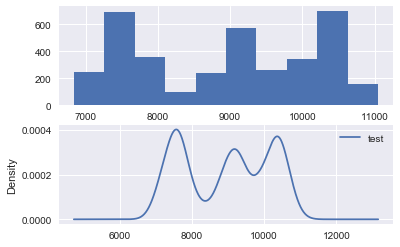

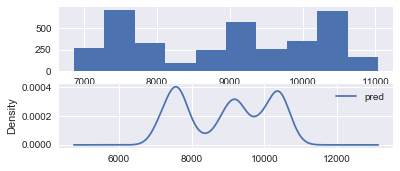

In [350]:
from pandas import Series
from matplotlib import pyplot
series = df_plot['y_test']
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde',label='test')
pyplot.legend()
series2 = df_plot['y_pred']
pyplot.figure(2)
pyplot.subplot(311)
series2.hist()
pyplot.subplot(312)
series2.plot(kind='kde',label='pred')
pyplot.legend()
pyplot.show()


In [ ]:
##### Try lasso Regression

In [409]:
#clf = linear_model.Lasso(alpha=0)
clf=Lasso()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_pred2=clf.predict(X_test2)

In [410]:
lasso_train_score = clf.score(X_train2,y_train2)
lasso_train_score

0.9993681288797488

In [411]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

21.543806035916862

In [414]:
#rmse_val = rmse(y_test2, y_pred2)
#print("rms error is: " + str(rmse_val))

In [415]:
clf.coef_

array([7674.70946102, 1189.88993025,  542.61846793,    0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
        417.17632442,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.     

In [ ]:
#### Trying elastic net

In [425]:
#clf = linear_model.Lasso(alpha=0)
clf=ElasticNet()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_train_pred2 = clf.predict(X_train2)
y_pred2=clf.predict(X_test2)

In [420]:
lasso_train_score = clf.score(X_train2,y_train2)
lasso_train_score

0.9674017963089836

In [424]:
lasso_test_score = clf.score(X_test2,y_test2)
lasso_test_score

0.9674619206754227

In [426]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train2, y_train_pred2)

190.09532979336564

In [421]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

191.52946125367293

In [422]:
clf.coef_

array([ 49.19366115,  49.0773795 ,  49.18314547,   7.87680139,
        -1.4914229 ,  15.18805357,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  49.21356945,  49.20457535,  49.18892228,
        49.17212918,  49.15365641,  49.1408689 ,  49.12911891,
        49.11954121,  49.11113479,  49.10616512,  49.1025362 ,
        49.10022895,  49.09716098,  49.09629975,  49.09686902,
        49.09688308,  49.09657076,  49.0947073 ,  49.09203912,
        49.06105294,  48.98777913,  48.92921744,  48.8769093 ,
        48.82853022,  48.78541703,  48.74639072,  48.70811015,
        48.67331133,  48.63933471,  48.60536373,  48.57194185,
        48.54125749,  48.51034781,  48.48168253,  48.45438004,
        48.4297264 ,  48.40821053,  48.38816572,  49.18307702,
        49.137798  ,  49.09678268,  49.05979292,  49.02

In [ ]:
####### Principal Component Analysis